# Problem Set #4

### MACS 30150, Dr. Evans
### Ruixi Li

Due Wednesday, Feb. 6 at 11:30am

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sts
import scipy.optimize as opt
from scipy.integrate import quad
import warnings
warnings.filterwarnings("ignore")

## Question 1

#### (a)

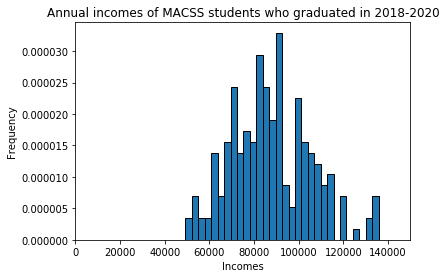

In [2]:
pts = np.loadtxt('data/incomes.txt')

num_bins = 30
plt.hist(pts, num_bins, density=True, edgecolor='k')
plt.title('Annual incomes of MACSS students who graduated in 2018-2020') 
plt.xlabel('Incomes')
plt.ylabel('Frequency')
plt.xlim([0, 150000])
plt.show()

#### (b)

In [3]:
def trunc_lognorm_pdf(x, mu, sigma, cut_lb, cut_ub):
    if cut_ub == 'None' and cut_lb == 'None':
        prob_notcut = 1.0
    elif cut_ub == 'None' and cut_lb != 'None':
        prob_notcut = 1.0 - sts.lognorm.cdf(cut_lb, s=sigma, scale=np.exp(mu))
    elif cut_ub != 'None' and cut_lb == 'None':
        prob_notcut = sts.lognorm.cdf(cut_ub, s=sigma, scale=np.exp(mu))
    elif cut_ub != 'None' and cut_lb != 'None':
        prob_notcut = sts.lognorm.cdf(cut_ub, s=sigma, scale=np.exp(mu)) - \
                      sts.lognorm.cdf(cut_lb, s=sigma, scale=np.exp(mu))

    pdf_vals = ((1/(x*sigma * np.sqrt(2 * np.pi)) 
                 * np.exp( -(np.log(x)-mu)**2 / (2*sigma**2))) 
                / prob_notcut)

    return pdf_vals

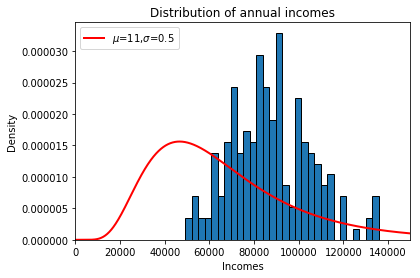

In [4]:
plt.hist(pts, num_bins, density=True, edgecolor='k')


dist_pts = np.linspace(0, 150000, 1000)
mu_1 = 11
sig_1 = 0.5

plt.plot(dist_pts, trunc_lognorm_pdf(dist_pts, mu_1, sig_1, 1, 150000),
         linewidth=2, color='r', label='$\mu$=11,$\sigma$=0.5')
plt.title('Distribution of annual incomes')
plt.xlabel('Incomes')
plt.ylabel('Density')
plt.legend(loc='upper left')
plt.xlim([0, 150000])
plt.show()

In [5]:
def log_lik_trunclognorm(x, mu, sigma, cut_lb, cut_ub):
    pdf_vals = trunc_lognorm_pdf(x, mu, sigma, cut_lb, cut_ub)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    
    return log_lik_val

print('Log-likelihood: ', log_lik_trunclognorm(pts, mu_1,
                                               np.exp(sig_1), 0, 150000))

Log-likelihood:  -2493.781453144371


#### (c)

In [6]:
def crit(params, *args):
    mu, sigma = params
    x, cut_lb, cut_ub = args
    log_lik_val = log_lik_trunclognorm(x, mu, abs(sigma), cut_lb, cut_ub)
    neg_log_lik_val = -log_lik_val
    
    return neg_log_lik_val

In [7]:
import scipy.optimize as opt

mu_init = 11
sig_init = 0.5
params_init = np.array([mu_init, sig_init])
mle_args = (pts, 0, 150000)
results_uncstr = opt.minimize(crit, params_init, args=(mle_args))

mu_MLE, sig_MLE = results_uncstr.x
MLE = log_lik_trunclognorm(pts, mu_MLE, sig_MLE, 0, 150000)
Hess = results_uncstr.hess_inv
print('mu_MLE=', mu_MLE, ' sig_MLE=', sig_MLE)
print('The value of the likelihood function is ', MLE)
print('The inverse Hessian matrix is ', Hess)

mu_MLE= 11.361699972314367  sig_MLE= 0.21174326151538592
The value of the likelihood function is  -2240.9343375116364
The inverse Hessian matrix is  [[0.00049802 0.00019204]
 [0.00019204 0.00015645]]


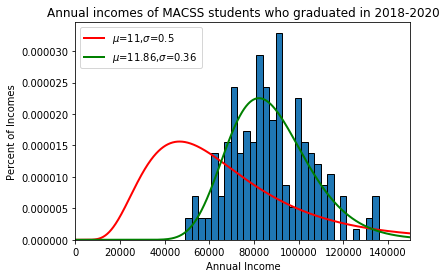

In [8]:
# Plot the histogram of the data
plt.hist(pts, num_bins, density=True, edgecolor='k')
plt.title('Annual incomes of MACSS students who graduated in 2018-2020')
plt.xlabel('Annual Income')
plt.ylabel('Percent of Incomes')
plt.xlim([0, 150000])

# Plot the PDF from (b)
plt.plot(dist_pts, trunc_lognorm_pdf(dist_pts, mu_1, sig_1, 1, 150000),
         linewidth=2, color='r', label='$\mu$=11,$\sigma$=0.5')
plt.legend(loc='upper left')

# Plot the MLE estimated distribution
plt.plot(dist_pts, trunc_lognorm_pdf(dist_pts, mu_MLE, sig_MLE, 1, 150000),
         linewidth=2, color='g', label='$\mu$=11.86,$\sigma$=0.36')
plt.legend(loc='upper left')

plt.show()

#### (d)

In [9]:
mu_new, sig_new = np.array([420, 130])
log_lik_h0 = log_lik_trunclognorm(pts, mu_1, sig_1, 0, 150000)
print('hypothesis value log likelihood', log_lik_h0)
log_lik_mle = log_lik_trunclognorm(pts, mu_MLE, sig_MLE, 0, 150000)
print('MLE log likelihood', log_lik_mle)
LR_val = 2 * (log_lik_mle - log_lik_h0)
print('likelihood ratio value', LR_val)
pval_h0 = 1.0 - sts.chi2.cdf(LR_val, 2)
print('chi squared of H0 with 2 degrees of freedom p-value = ', pval_h0)

hypothesis value log likelihood -2379.120591931827
MLE log likelihood -2240.9343375116364
likelihood ratio value 276.37250884038167
chi squared of H0 with 2 degrees of freedom p-value =  0.0


From the results above, we could reject the null hypothesis that the probability that the data in incomes.txt came from the distribution in part (b).

#### (e)

In [10]:
p1 = 1 - sts.lognorm.cdf(100000, s=sig_MLE, scale=np.exp(mu_MLE))
print('Probability of earning more than $100,000 is ', p1)
p2 = sts.lognorm.cdf(75000, s=sig_MLE, scale=np.exp(mu_MLE))
print('Probability of earning less than $75,000 is ', p2)

Probability of earning more than $100,000 is  0.23755401366049256
Probability of earning less than $75,000 is  0.25964392494980326


## Question 2

#### (a)

In [11]:
text = []
with open('data/sick.txt') as f:
    for line in f:
        text.append(line.rsplit()[0].split(','))
text = np.array(text)
df = pd.DataFrame(text[1:], columns=['sick', 'age', 'children', 'temp_winter']).astype('float64')
df.head()

,sick,age,children,temp_winter
0,1.67,57.47,3.04,54.10
1,0.71,26.77,1.20,36.54
2,1.39,41.85,2.31,32.38
3,1.37,51.27,2.46,52.94
4,1.45,44.22,2.72,45.90


In [12]:
def norm_pdf(x, sig): 
    sig=abs(sig)
    pdf_vals = (1/(sig*np.sqrt(2*np.pi)))*np.exp(-(x)**2 / (2*sig**2)) 
    return pdf_vals

def log_lik_norm(y, x1, x2, x3, b0, b1, b2, b3, sig):
    err=y-b0-b1*x1-b2*x2-b3*x3
    pdf_vals = norm_pdf(err, sig)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    return log_lik_val

def crit_2(params,*args):
    b0, b1, b2, b3, sig = params
    y, x1, x2, x3 = args
    log_lik_val = log_lik_norm(y, x1, x2, x3, b0, b1, b2, b3, sig).astype('float64')
    neg_log_lik_val = -log_lik_val
    return neg_log_lik_val

In [13]:
b0_init, b1_init, b2_init, b3_init, sig_init = (0.2, 0, 0, 0, 1)
y = df['sick']
x1, x2, x3 = df['age'], df['children'], df['temp_winter']

params_init = np.array([b0_init, b1_init, b2_init, b3_init, sig_init])
results = opt.minimize(crit_2, params_init, (y, x1, x2, x3))
b0, b1, b2, b3, sig = results.x
print('b0 = ', b0)
print('b1 = ', b1)
print('b2 = ', b2)
print('b3 = ', b3)
print('sigma = ', sig)

b0 =  0.25164657743236246
b1 =  0.012933389662209218
b2 =  0.40050177159977757
b3 =  -0.00999170144778414
sigma =  0.003017676295795841


In [14]:
Hess = results.hess_inv
MLE = log_lik_norm(y, x1, x2, x3, b0, b1, b2, b3, sig)
print('The value of the likelihood function is ', MLE)
print('The inverse Hessian matrix is ', Hess)

The value of the likelihood function is  876.8650477456889
The inverse Hessian matrix is  [[ 1.02601558e-06  6.76217712e-09 -1.61457419e-07 -2.23447561e-08
  -2.62509024e-09]
 [ 6.76217712e-09  3.99882010e-09 -3.59520203e-08 -2.49007806e-09
  -2.98856777e-10]
 [-1.61457419e-07 -3.59520203e-08  3.75727605e-07  2.26789439e-08
   4.78055308e-10]
 [-2.23447561e-08 -2.49007806e-09  2.26789439e-08  1.95181525e-09
   2.90327774e-10]
 [-2.62509024e-09 -2.98856777e-10  4.78055308e-10  2.90327774e-10
   2.29769926e-08]]


#### (b)

In [16]:
b0_1, b1_1, b2_1, b3_1, sig_1 = 1, 0, 0, 0, 0.1
log_lik_h1 = log_lik_norm(y, x1, x2, x3, b0_1, b1_1, b2_1, b3_1, sig_1)
print('Hypothesis value log likelihood', log_lik_h1)
log_lik_mle = log_lik_norm(y, x1, x2, x3, b0, b1, b2, b3, sig)
print('MLE log likelihood', log_lik_mle)
LR_val = 2 * (log_lik_mle - log_lik_h1)
print('Likelihood ratio value', LR_val)
pval_h1 = 1.0 - sts.chi2.cdf(LR_val, 2)
print('chi squared of H0 with 5 degrees of freedom p-value = ', pval_h1)

Hypothesis value log likelihood -2253.700688042125
MLE log likelihood 876.8650477456889
Likelihood ratio value 6261.131471575628
chi squared of H0 with 5 degrees of freedom p-value =  0.0


From the results above, we could reject the null hypothesis that that age, number of children, and average winter temperature have no effect on the number of sick days. The likelihood that age, number of children, and average winter temperature have no effect on the number of sick days is 0.